EasyOCR from https://github.com/JaidedAI/EasyOCR

In [1]:
!pip install --quiet easyocr

# Looking into the dataset

This section is just to look into the dataset. You can ignore this section.

In [2]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
imgs = load_images_from_folder("/kaggle/input/sample/Sample datasets")

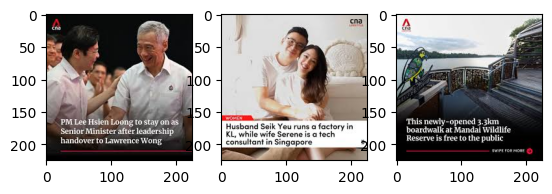

In [4]:
import matplotlib.pyplot as plt

for i in range(len(imgs)):
    image_rgb = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB) 
    plt.subplot(1, 3, i+1)
    plt.imshow(image_rgb)

# Running the OCR

In [5]:
import easyocr

# download will only run once to load into memory
reader = easyocr.Reader(['en']) 

Change here to your own directory!

In [6]:
# change folder path here!
folder_path = "/kaggle/input/sample/Sample datasets/"
output_path = "/kaggle/working/"

OCR model runs on each images, and writes the text output to a text file. Only text output with conf score >= 0.5 will be written out. This is for tuning. 

Please refer to  the API docs: https://www.jaided.ai/easyocr/documentation/

In [7]:
for image in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image)
    result = reader.readtext(image_path)
    # result stored in a list of tuple
    # get prediction text for conf >= 0.5
    text = ' '.join(item[1] for item in result if item[2] >= 0.5)
    out_path = os.path.join(output_path, 'text_output.txt')
    with open(out_path, 'a') as f:
        f.write(text + '\n')

Check the text that has been generated

In [8]:
with open(f"{output_path}text_output.txt", 'r') as f:
    res = f.read()
    print(res)
    

PM Lee Hsien Loong to stayon as Senior Minister after leadership handover to Lawrence Wong
Husbond Seik Yeu runs factory in KL, while wife Serene tech consultant in Singapore
This newly-opened 3kmn boardwalk at Mandai Wildlife Reserve is free to the public

